# Práctica con ordenador 4. Filogenia mitocondrial de homínidos modernos y arcaicos
## Preparación del ordenador
En esta práctica utilizaremos los paquetes `phangorn`, `Biostrings` y `pegas`. Si no están instalados en tu ordenador, ejecuta las órdenes siguientes en un terminal:

> `install.packages('phangorn')`

> `install.packages('BiocManager')`

> `BiocManager::install('DECIPHER')`

> `install.packages('pegas')`

Y a continuación, cárgalos:

In [1]:
suppressMessages(library('phangorn'))
suppressMessages(library('DECIPHER'))
suppressMessages(library('pegas'))

## Introducción
En la web [http://www.phylotree.org](http://www.phylotree.org) se acumulan más de 24000 secuencias completas de ADN mitocondrial humano. Toda la diversidad genética mitocondrial de las poblaciones humanas actuales puede clasificarse eun unos pocos haplotipos proncipales, la filogenia de los cuales se reproduce en la figura siguiente:

![](phylotree.png)

El objetivo de esta práctica es utilizar los datos de ADN mitocondrial para estudiar las relaciones filogenéticas entre humanos actuales y algunos de nuestros parientes más próximos, como los neandertales y los denisovanos. Además, aplicaremos la teoría de coalescencia a datos para extraer información sobre las diferentes poblaciones de homínidos.

Los datos se encuentran en el archivo `mtDNA.fasta` y son un alineamiento de los cromosomas mitocondriales completos de 9 humanos modernos, 23 neandertales, 4 denisovanos, un *Homo heidelbergensis*, 4 bonobos (*Pan paniscus*), 4 xchimpancés (*Pan troglodytes*) y un gorila (que nos servirá de *outgroup*).

## Reconstrucción filogenética y calibrado del reloj molecular
Igual que en la práctica anterior, el bloque de código siguiente carga las secuencias (ya alineadas) en la sesión de trabajo, y las muestra en una pestaña nueva del navegador:

In [2]:
mtDNA <- readDNAStringSet('mtDNA.fasta')
BrowseSeqs(mtDNA, htmlFile = 'mtDNA.html', openURL = TRUE)

Para reconstruir la filogenia de las secuencias podemos estimar las distancias genéticas entre ellas con un modelo de evolución molecular y aplicar el algoritmo *neighbor joining*, que es eficiente y suficientemente preciso. Observa que la función que estima las distancias `dist.dna()`, exige que transformemos primero el alineamiento en un objeto de tipo `DNAbin`:

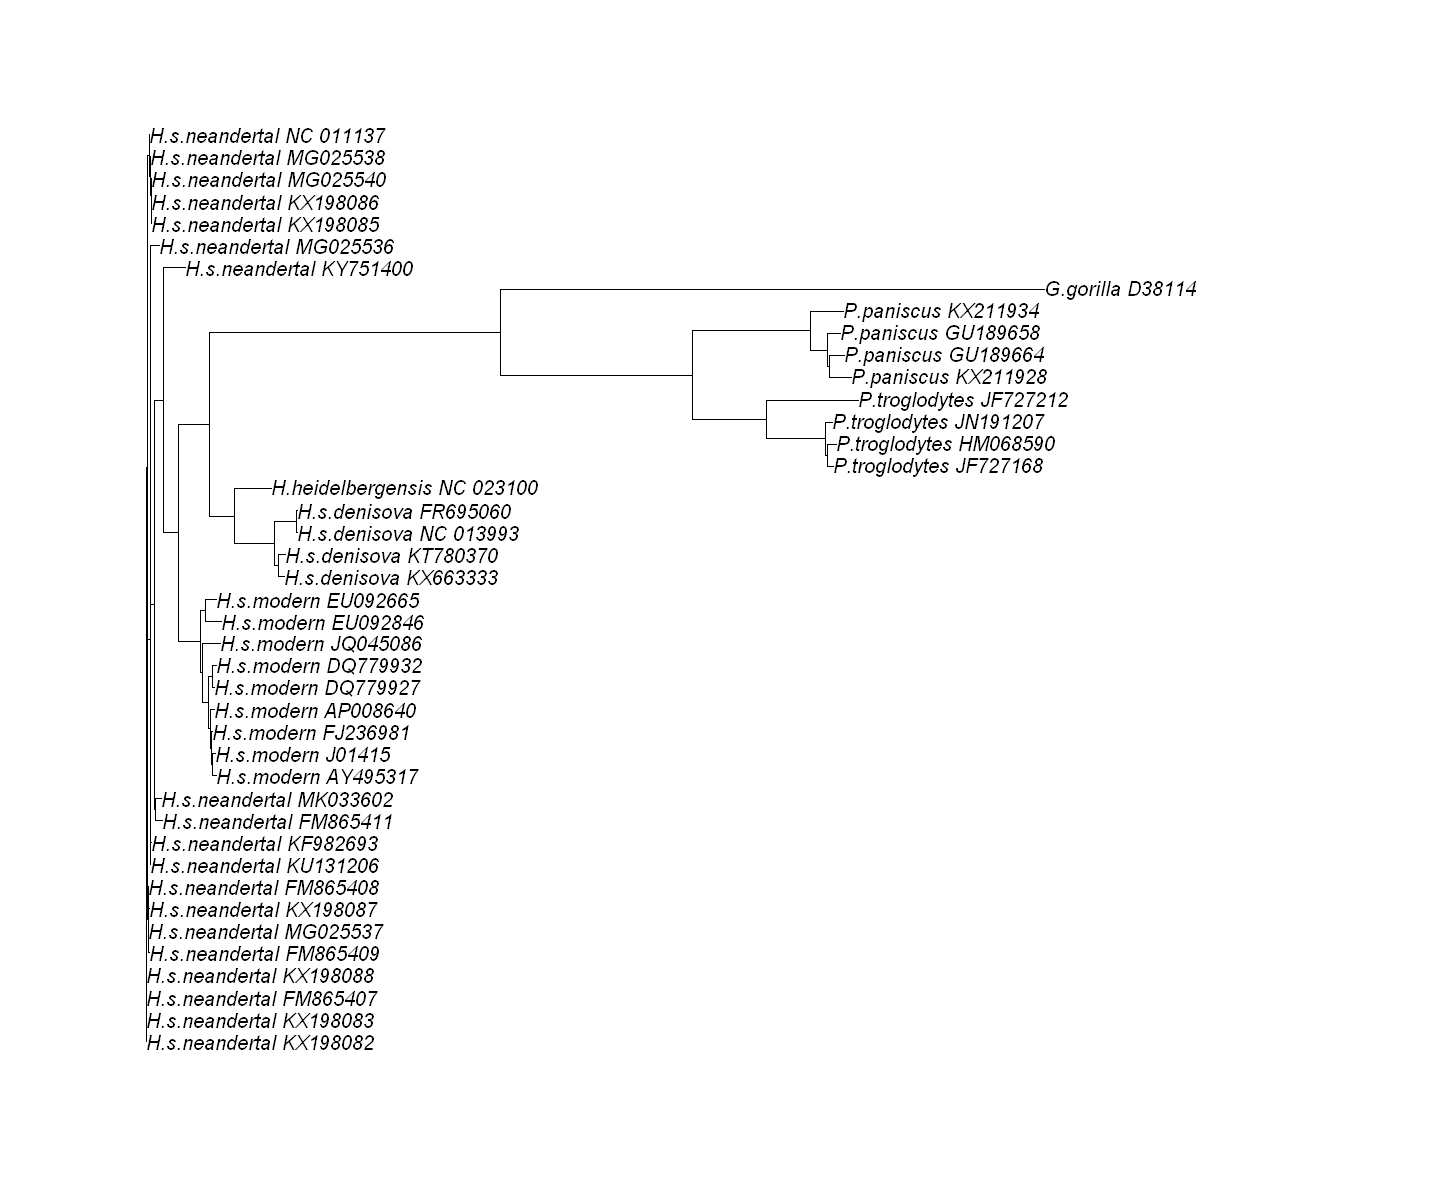

In [4]:
options(repr.plot.width = 12, repr.plot.height = 10)
mtDNAb <- as.DNAbin(mtDNA)
distancias <- dist.dna(mtDNAb, model = 'K81')
arbol <- NJ(distancias)
plot(arbol)

El *neighbor-joining* produce árboles *no enraizados*. Para visualizar el árbol más correctamente podemos indicar que la secuencia del gorila (*G.gorilla_D38114*) es el *outgroup*.

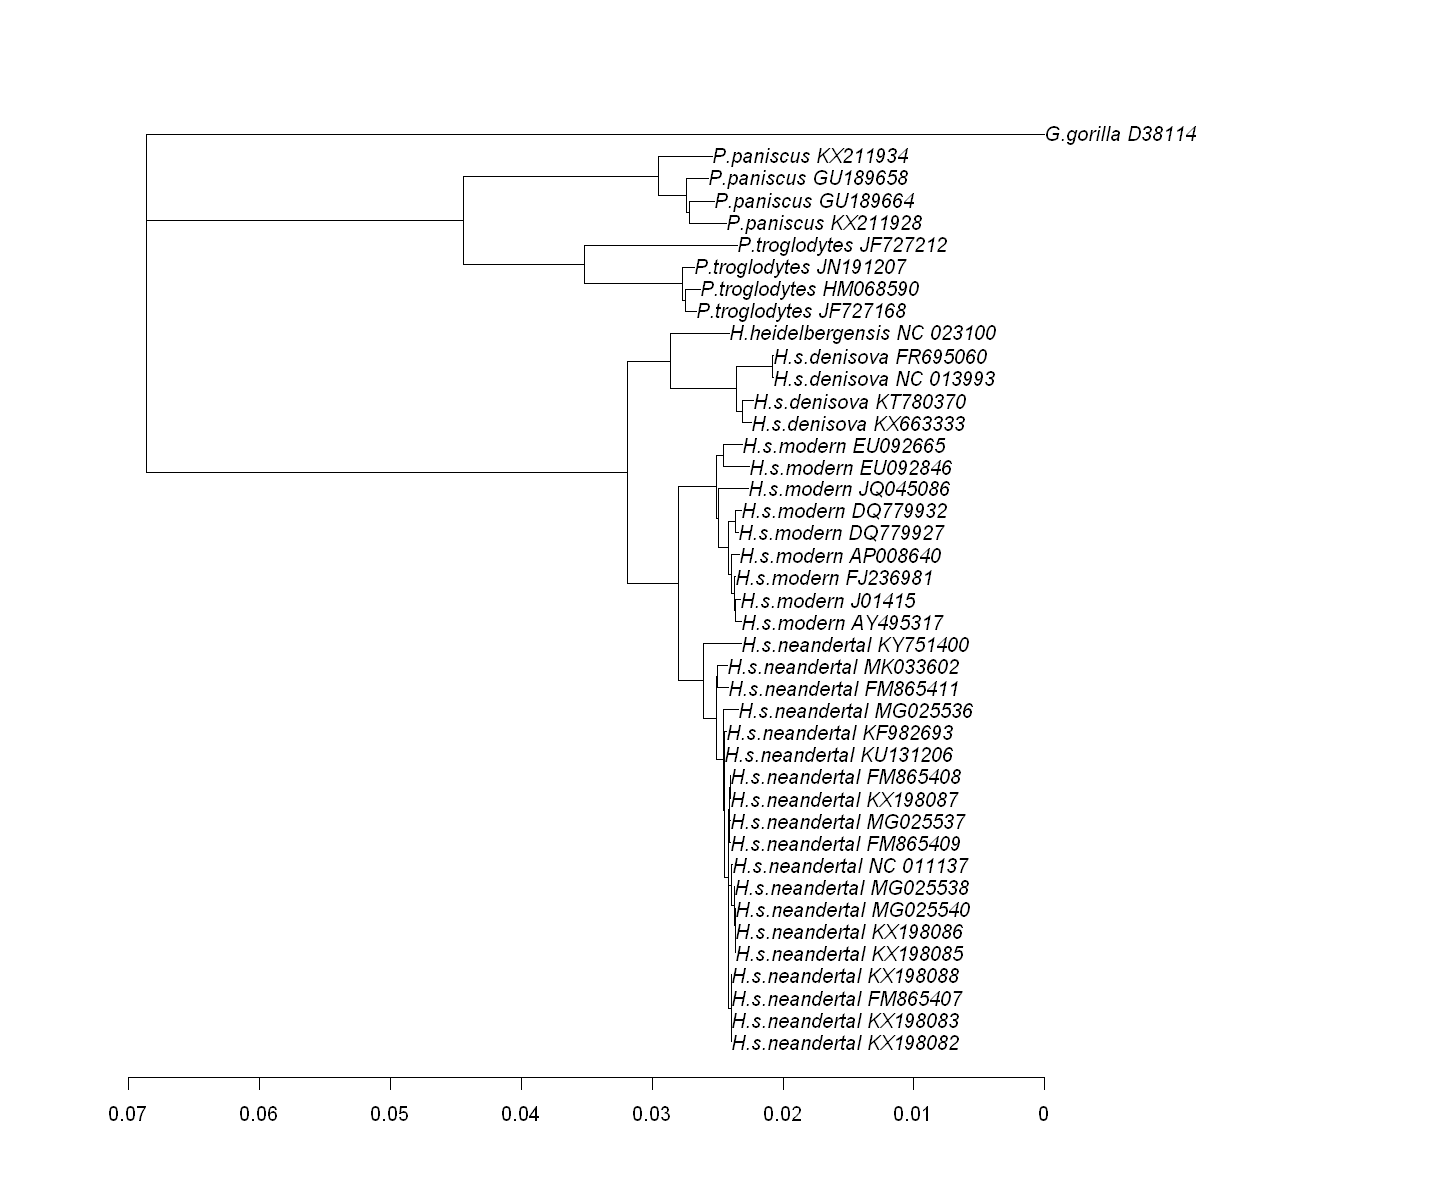

In [5]:
arbol <- root(arbre, outgroup = 'G.gorilla_D38114', resolve.root = TRUE)
plot(arbol)
axisPhylo()

Al enraizar el árbol, las ramas aparecen *orientadas*: el tiempo avanza desde la raíz hacia las puntas (u *hojas*). Pero el árbol todavía no es ultramétrico: la distancia (número de sustituciones por nucleótido) desde la raíz hasta cualquiera de las hojas no es siempre la misma. Hay al menos dos buenos otivos para que no sea ultramétrico. En primer lugar, el punto exacto de enraizamiento de el árbol es arbitrario. Dentro de la rama que separa el *outgroup*, la función `root()` podía haber elegido un punto más a la derecha, para alinear mejor el gorila con las demás hojas del árbol. En segundo lugar, no todas las secuencias son contemporáneas y, por tanto, no todas tienen que haber acumulado la misma cantidad de cambios desde la raíz. Podemos intentar solucionar estos dos problemas con la función `rtt()` del paquete `ape` (cargado automáticamente con `phangorn`). En el bloque siguiente, `rtt()` fija la raíz del árbol en la posición mñas compatible posible con la hipótesis del **reloj molecular** y teniendo en cuenta la edad estimada de las secuencias, de acuerdo con la información recogida del apéndice. 

In [ ]:
tipDates <- c(0, 0, 0, 0, 0, 0, 0, 0, 0,
              -400000,
              -39000, -50000, -110000, -110000,
              -39820, -40096, -38515, -38310, -39000, -40000, -41210,
              -42430, -42540, -43230, -43780, -44290, -44770, -49000,
              -50000, -82752, -65000, -122287, -110450,
              0, 0, 0, 0, 0, 0, 0, 0, 0)
              
arbol <- rtt(arbre, tip.dates = tipDates, objective = 'rms')
plot(arbol, x.lim = 0.08, label.offset = 0.001)
axisPhylo()

Las longitudes de las ramas del árbol representan el número estimado de cambios nucleotídicos acumulados en cada rama. SI sumáramos las longitudes de las ramas que separan las dos hojas, encontraríamos un valor muy similar a la distancia estimada antes con la función `dist.dna()`.

Si los cambios nucleotídicos se acumularan exactamente al mismo ritmo en todas las ramas (hipótesis del reloj molecular) y si las hubiésemos estimado sin error, entonces las longitudes de las ramas serían *también* proporcionales al tiempo transcurrido, y podríamos datar los ancestros (o nodos internos) a partir de su profundidad en el árbol.

La función `estimate.dates()` utiliza las fechas conocidas para estimar las edades o fechas del resto de nodos de un árbol enraizado. Para facilitar la tarea, le proporcionaremos un vector con con las edades, no sólo de las hujas del árbol (42 primeros nodos), sino también del ancestro común más reciente entre humanos y chimpancés (nodo 44 del árbol): 6.5 millones de años, aproximadamente.

In [ ]:
nodeDates <- rep(NA, 83)
nodeDates[1:42] <- tipDates
nodeDates[44] <- -6500000
edadesEstimadas <- estimate.dates(arbre, node.dates = nodeDates)
round(edadesEstimadas,0)

In [ ]:
par(mar = c(5,5,0,0))
plot(arbol, x.lim = c(-0.0015, 0.08), label.offset = 0.001)
nodelabels(round(edadesEstimadas[43:83],0),
           frame = 'none', cex = 0.7, adj = c(1.1, -0.2))
axisPhylo()

## Mida poblacional efectiva
Contesta les preguntes següents. Pots fer-ho sobre aquest mateix document, fent doble click al bloc de text corresponent.

1. Quina edat se li atribueix a l'ancestre comú més recent de les 9 mostres humanes? I a l'ancestre comú més recent de les mostres neandertals?

2. Assumint un temps de generació de 20 anys, quantes generacions enrere va viure l'ancestre comú més recent de les 9 mostres d'humans moderns?

3. Assumint el mateix temps de generació i suposant que els 19 neandertals van viure fa 53550 anys, quantes generacions els separen del seu ancestre comú més recent?

4. D'acord amb la teoria de la coalescència, l'ancestre comú més recent d'una mostra aleatòria d'*n* seqüències *haploides* d'una població de mida constant esperem trobar-lo, en promig, quasi tantes generacions enrere com dues vegades el nombre individus *efectius*. És a dir, $E(H_n)\approx 2N_e$. D'acord amb açò, quines serien les mides poblacionals efectives dels humans moderns, dels neandertals, dels denisovans, dels ximpanzés i dels bonobos?

## Taxa de mutació mitocondrial
La mida poblacional efectiva i la taxa de mutació determinen juntes la diversitat genètica d'una població, mitjançant el paràmetre $\theta = 4N_e\mu$, en diploides, o $\theta = 2N_e\mu$, en haploides. La diversitat la podem mesurar com $\pi$, la proporció mitjana de diferències nucleotídiques entre dues seqüències triades a l'atzar en la població, o com la proporció $s$ de posicions variables d'un alineament d'*n* seqüències aleatòriament triades en la població. Les esperances teòriques d'aquestes mesures són $E(\pi)=\theta$ i $E(s)=\theta\sum_{i=1}^{n-1}\frac{1}{i}$, on $\theta$ és $2N_e\mu$ en haploides.

El codi següent examina l'alineament original i extreu el nombre de llocs variables entre les seqüències d'humans moderns:

In [ ]:
length(seg.sites(mtDNAb[startsWith(names(mtDNAb), 'H.s.modern')]))

5. Seguint l'exemple del comandament anterior, troba el nombre de llocs segregants entre les seqüències de cada població.

6. Tenint en compte que l'alineament és de 16603 posicions, utilitza la proporció de llocs variables i les estimacions prèvies de mida poblacional per estimar la taxa de mutació mitocondrial en cada població.

El paràmetre $\pi$ de cada població es pot obtenir amb la funció `nuc.div()` del paquet `pegas`. Al bloc següent s'estima la $\pi$ dels ximpanzés:

In [ ]:
nuc.div(mtDNAb[startsWith(names(mtDNAb), 'P.troglodytes')])

7. Seguint el model, estima tu els valors de $\pi$ per a la resta de poblacions.

8. Estima de nou les taxes de mutació mitocondrials de cada població, però ara a partir dels valors estimats de $\pi$. Com es comparen els valors?

9. A partir de la datació dels nodes de l'arbre, també podem estimar una taxa de mutació mitjana, de tot l'arbre. Executa el comandament següent i veges com es compara amb les taxes de mutació que has estimat abans. Sabries dir en quines unitats estan les taxes de mutació?

In [ ]:
estimate.mu(arbre, nodeDates)

# Apèndix

 |   Espècie         |  Número d'accés |    Edat (anys) |   Referència          |  Nom                 |
 | ----------------- | --------------- | -------------- | --------------------- | -------------------- |
 | H.heidelbergensis |     NC_023100   |     400.000    | Meyer et al. 2014     | -                    |
 | H.s.denisova      |     NC_013993   |  30.000-48.000 | Krause et al. 2010    | Denisova 3 (falange) |
 | H.s.denisova      |     FR695060    |     >50.000?   | Reich et al. 2010     | Denisova 4 (molar)   |
 | H.s.denisova      |     KX663333    |     >100.000   | Slon et al. 2017      | Denisova 2 (dent)    |
 | H.s.denisova      |     KT780370    |     110.000?   | Sawyer et al. 2015    | Denisova 8 (molar)   |
 | H.s.neandertal    |     KX198085    |  32.697-46.942 | Posth et al. 2017     | GoyetQ374a-1         |
 | H.s.neandertal    |     KX198086    |  33.134-47.057 | Posth et al. 2017     | GoyetQ305-7          |
 | H.s.neandertal    |     MG025538    |  37.880-39.150 | Hajdinjak et al. 2018 | Spy-94a              |
 | H.s.neandertal    |     NC_011137   |      38.310    | Green et al. 2008     | Vindija 33.16        |
 | H.s.neandertal    |     FM865409    |      39.000    | Briggs et al. 2009    | Sidron 1253          |
 | H.s.neandertal    |     FM865407    |      40.000    | Briggs et al. 2009    | Feldhofer 1          |
 | H.s.neandertal    |     KX198088    |  40.620-41.800 | Rougier et al. 2016   | GoyetQ57-2           |
 | H.s.neandertal    |     KX198083    |  41.960-42.900 | Rougier et al. 2016   | GoyetQ57-3           |
 | H.s.neandertal    |     MG025540    |  42.080-43.000 | Hajdinjak et al. 2018 | GoyetQ56-1           |
 | H.s.neandertal    |     MG025536    |  42.720-43.740 | Hajdinjak et al. 2018 | Les Cottés Z4-1514   |
 | H.s.neandertal    |     MG025537    |  42.960-44.600 | Hajdinjak et al. 2018 | Mezmaiskaya2         |
 | H.s.neandertal    |     KX198087    |  43.430-45.150 | Rougier et al. 2016   | GoyetQ305-4          |
 | H.s.neandertal    |     KX198082    |  43.910-45.630 | Rougier et al. 2016   | GoyetQ57-1           |
 | H.s.neandertal    |     FM865408    |      49.000    | Briggs et al. 2009    | Feldhofer 2          |
 | H.s.neandertal    |     KU131206    |      >50.000   | Brown et al. 2016     | DC1227               |
 | H.s.neandertal    |     KF982693    | 56.213-109.290 | Posth et al. 2017     | Okladnikov2          |
 | H.s.neandertal    |     FM865411    |  60.000-70.000 | Briggs et al. 2009    | Mezmaiskaya1         |
 | H.s.neandertal    |     KY751400    | 62.013-182.560 | Posth et al. 2017     | HST                  |
 | H.s.neandertal    |     MK033602    | 90.900-130.000 | Douka et al. 2019     | Denisova15           |

## Bibliography

- Briggs, A.W. et al. 2009. *Science* 325(5938):318-21. [10.1126/science.1174462](https://doi.org/10.1126/science.1174462)
- Brown, S. et al. 2016. *Sci. Rep.* 6:23559. [10.1038/srep23559](https://doi.org/10.1038/srep23559)
- Douka, K. et al. 2019. *Nature* 565:640-644. [10.1038/s41586-018-0870-z](https://doi.org/10.1038/s41586-018-0870-z)
- Green, R.E. et al. 2008. *Cell* 134(3):416-426. [10.1016/j.cell.2008.06.021](https://doi.org/10.1016/j.cell.2008.06.021)
- Hajdinjak, M. et al. 2018. *Nature* 555(7698):652-656. [10.1038/nature26151](https://doi.org/10.1038/nature26151)
- Krause, J. et al.2010. *Nature* 464(7290):894-897 [10.1038/nature08976](https://doi.org/10.1038/nature08976)
- Meyer, M. et al. 2014. *Nature* 505(7483):403-406. [10.1038/nature12788](https://doi.org/10.1038/nature12788)
- Posth, C. et al. 2017. *Nat. Commun.* 8:16046. [10.1038/ncomms16046](https://doi.org/10.1038/ncomms16046)
- Reich, D. et al. 2010. *Nature* 468(7327):1053-60. [10.1038/nature09710](https://doi.org/10.1038/nature09710)
- Rougier, H. et al. 2016. *Sci. Rep.* 6:29005. [10.1038/srep29005](https://doi.org/10.1038/srep29005)
- Skoglund, P. et al. 2014. *Proc. Natl. Acad. Sci. U.S.A* 111(6):2229-2234. [10.1073%2Fpnas.1318934111](https://doi.org/10.1073%2Fpnas.1318934111)
- Sawyer, S. et al. 2015. *Proc. Natl. Acad. Sci. U.S.A.* 112(51):15696-15700. [10.1073/pnas.1519905112](https://doi.org/10.1073/pnas.1519905112)
- Slon, V. et al. 2017. *Sci. Adv.* 3:e1700186. [10.1126/sciadv.1700186](https://doi.org/10.1126/sciadv.1700186)
